In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import IFrame
from datetime import datetime

%matplotlib inline

In [2]:
confirmed_cases_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
deaths_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
cured_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [3]:
confirmed_cases = pd.read_csv(confirmed_cases_path)
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [4]:
deaths_data = pd.read_csv(deaths_path)
deaths_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,10,15,16,19,22,22,27,29,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [5]:
recovered_cases = pd.read_csv(cured_path)
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,33,34,34,35,35,35,35,41,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,101,118,118,118,118,118,144,144,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,96,96,97,105,105,109,114,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,26,26,26,35,42,42,49,60


#### Let us see the cumulative growth of number of cases per each day over the entire world

In [6]:
days_columns = confirmed_cases.columns[4:]

In [7]:
world_cases_growth = confirmed_cases[days_columns].sum(axis = 0).reset_index()
world_cases_growth.columns = ['Date', 'Count']

In [8]:
def isweekend(date):
    return datetime.isoweekday(pd.to_datetime(date)) > 5
world_cases_growth['isweekend'] = world_cases_growth['Date'].apply(isweekend).astype(int)

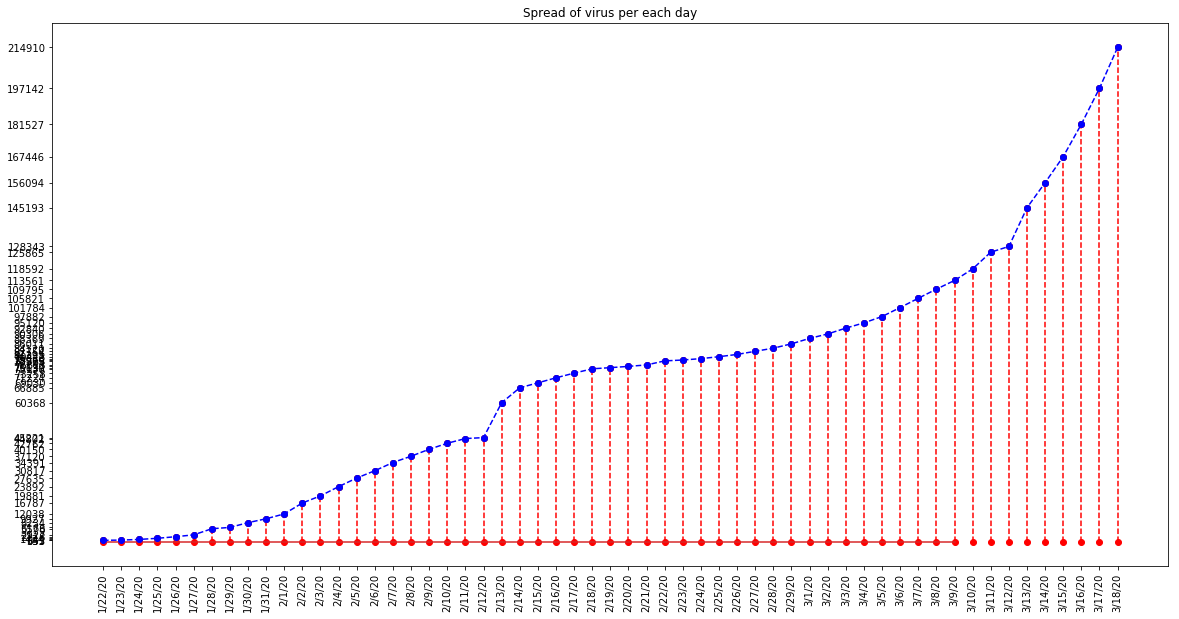

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.stem(world_cases_growth['Date'], world_cases_growth['Count'], '--ro')
plt.plot(world_cases_growth['Date'], world_cases_growth['Count'], '--bo')
plt.title("Spread of virus per each day")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.yticks(world_cases_growth['Count'])
plt.show()

##### Sudden spike can be seen from 12-Feb to 13-Feb almost 15000 cases were identified in just a single day . But most of them could be suspected cases.

#### Delta difference from day to day confirmed cases

In [10]:
world_cases_growth['delta_confirmed'] = world_cases_growth['Count'].sub(world_cases_growth['Count'].shift())
world_cases_growth.loc[0, 'delta_confirmed'] = world_cases_growth.loc[0, 'Count']

C:\Users\Amey\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

stem() got an unexpected keyword argument 'color'. This will raise a TypeError in future versions.



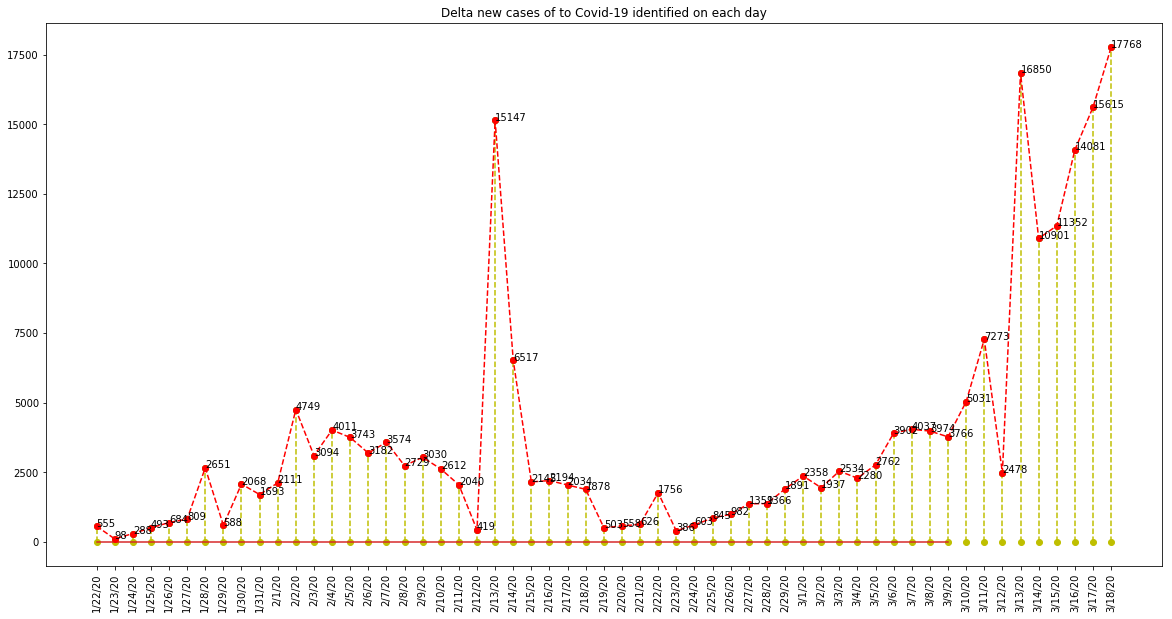

In [11]:
plt.rcParams['figure.figsize'] = [20,10]
plt.stem(world_cases_growth['Date'], world_cases_growth['delta_confirmed'], '--yo', color = world_cases_growth['isweekend'])
plt.plot(world_cases_growth['Date'], world_cases_growth['delta_confirmed'], '--ro')
for i in range(world_cases_growth.shape[0]):
    plt.text(world_cases_growth.loc[i, 'Date'], world_cases_growth.loc[i, 'delta_confirmed']+2, 
             world_cases_growth.loc[i,'delta_confirmed'].astype(int))
plt.title("Delta new cases of to Covid-19 identified on each day")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.show()

#### Parallelly let us compare the active cases to # of deaths on each day

In [12]:
world_cases_growth['deaths'] = deaths_data[days_columns].sum(axis = 0).reset_index(drop = True)

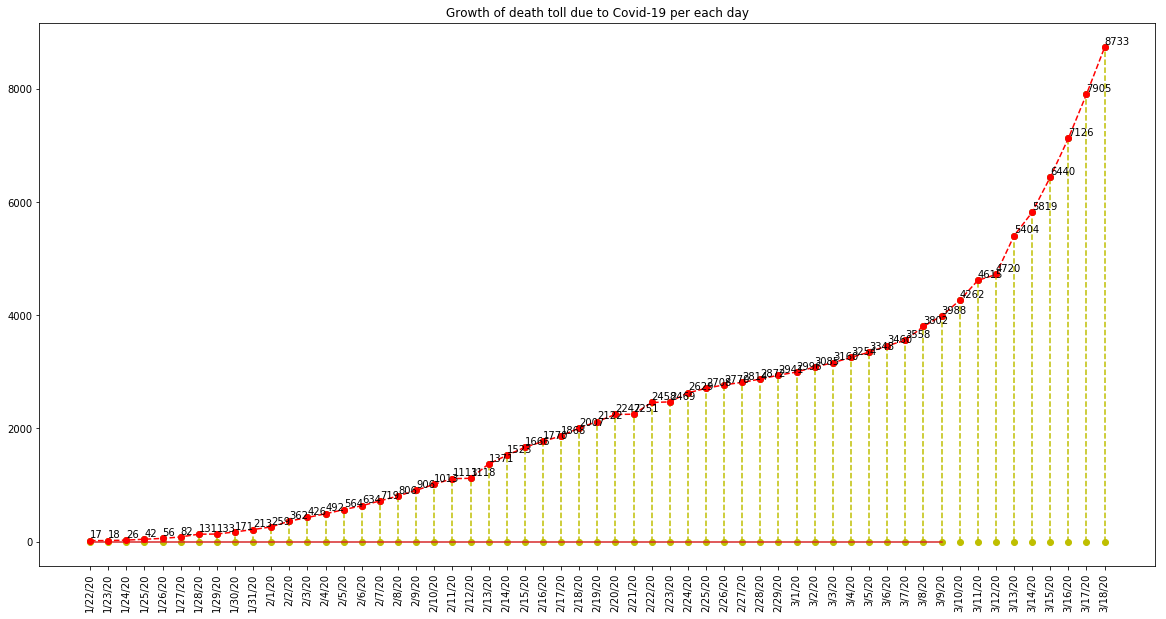

In [13]:
plt.rcParams['figure.figsize'] = [20,10]
plt.stem(world_cases_growth['Date'], world_cases_growth['deaths'], '--yo')
plt.plot(world_cases_growth['Date'], world_cases_growth['deaths'], '--ro')
for i in range(world_cases_growth.shape[0]):
    plt.text(world_cases_growth.loc[i, 'Date'], world_cases_growth.loc[i, 'deaths']+50, 
             world_cases_growth.loc[i,'deaths'])
plt.title("Growth of death toll due to Covid-19 per each day")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.show()

<b>But the above representation is a cumulative sum of previous day count and newly added count, We can look at the delta change for every day.</b>

In [14]:
world_cases_growth['delta_deaths'] = world_cases_growth['deaths'].sub(world_cases_growth['deaths'].shift())
world_cases_growth.loc[0, 'delta_deaths'] = world_cases_growth.loc[0, 'deaths']

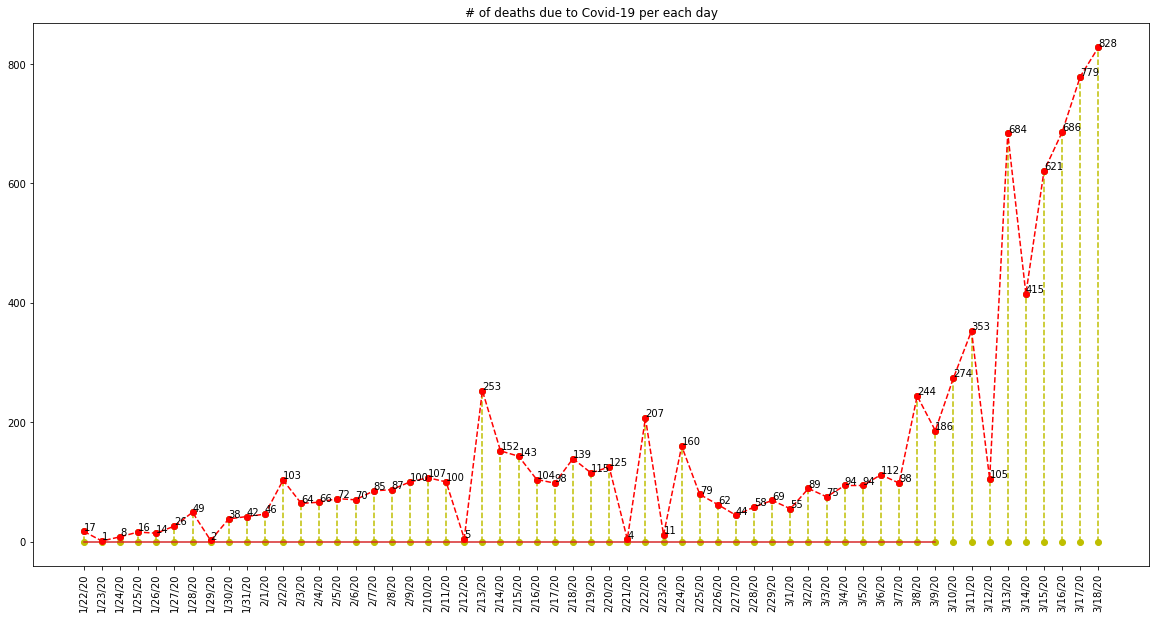

In [15]:
plt.rcParams['figure.figsize'] = [20,10]
plt.stem(world_cases_growth['Date'], world_cases_growth['delta_deaths'], '--yo')
plt.plot(world_cases_growth['Date'], world_cases_growth['delta_deaths'], '--ro')
for i in range(world_cases_growth.shape[0]):
    plt.text(world_cases_growth.loc[i, 'Date'], world_cases_growth.loc[i, 'delta_deaths']+2, 
             world_cases_growth.loc[i,'delta_deaths'].astype(int))
plt.title("# of deaths due to Covid-19 per each day")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.show()

#### Let us also see how many cases were cured on daily basis

In [16]:
world_cases_growth['recovered'] = recovered_cases[days_columns].sum(axis = 0).reset_index(drop = True)

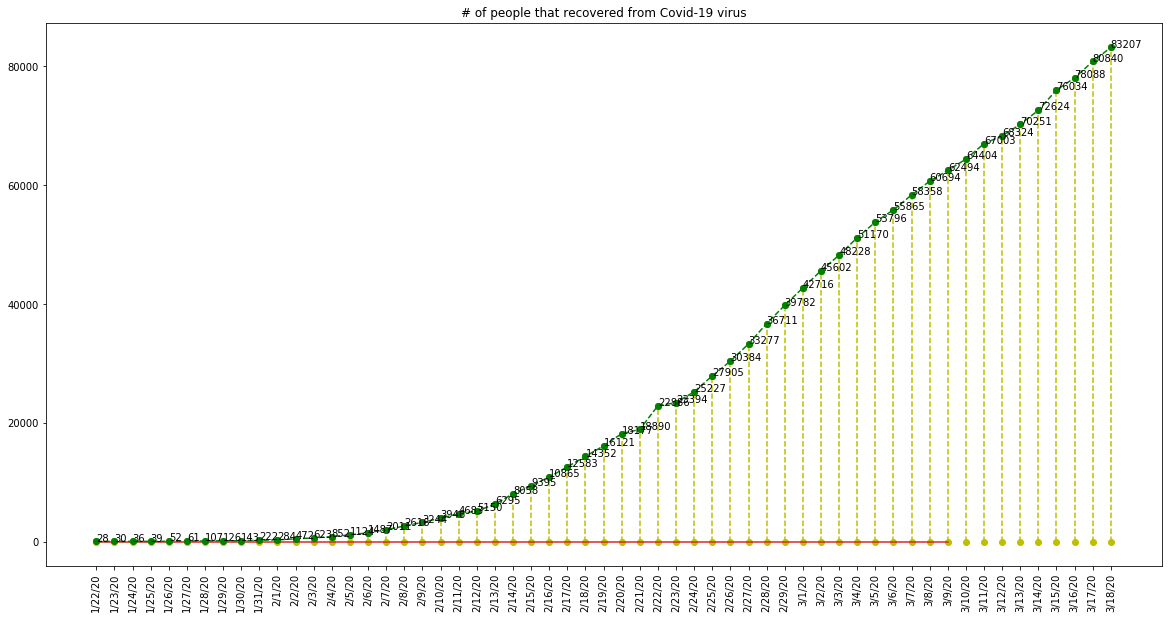

In [17]:
plt.rcParams['figure.figsize'] = [20,10]
plt.stem(world_cases_growth['Date'], world_cases_growth['recovered'], '--yo')
plt.plot(world_cases_growth['Date'], world_cases_growth['recovered'], '--go')
for i in range(world_cases_growth.shape[0]):
    plt.text(world_cases_growth.loc[i, 'Date'], world_cases_growth.loc[i, 'recovered']+50, 
             world_cases_growth.loc[i,'recovered'])
plt.title("# of people that recovered from Covid-19 virus")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.show()

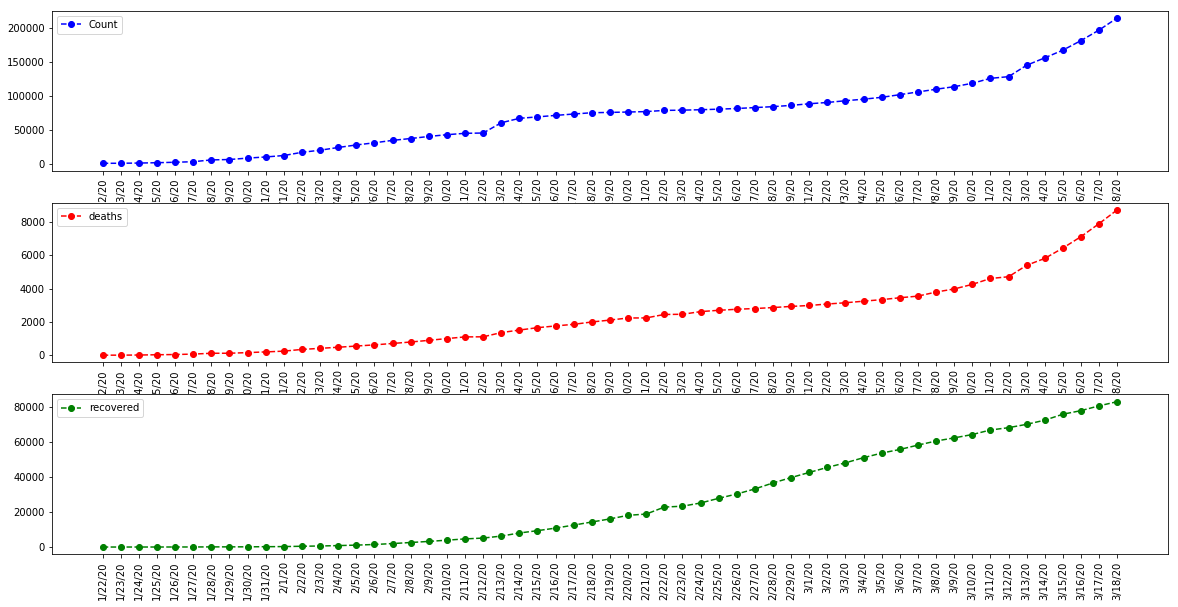

In [18]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure(1)
plt.subplot(311)
plt.plot(world_cases_growth['Date'], world_cases_growth['Count'], '--bo')
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend()

plt.subplot(312)
plt.plot(world_cases_growth['Date'], world_cases_growth['deaths'], '--ro')
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend()

plt.subplot(313)
plt.plot(world_cases_growth['Date'], world_cases_growth['recovered'], '--go')

plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend()
plt.show()

#### Stacked Bar plot of confirmed, recovered and death counts on daily bases

Text(0.5,1,'Stacked diagram of COVID-19 cases')

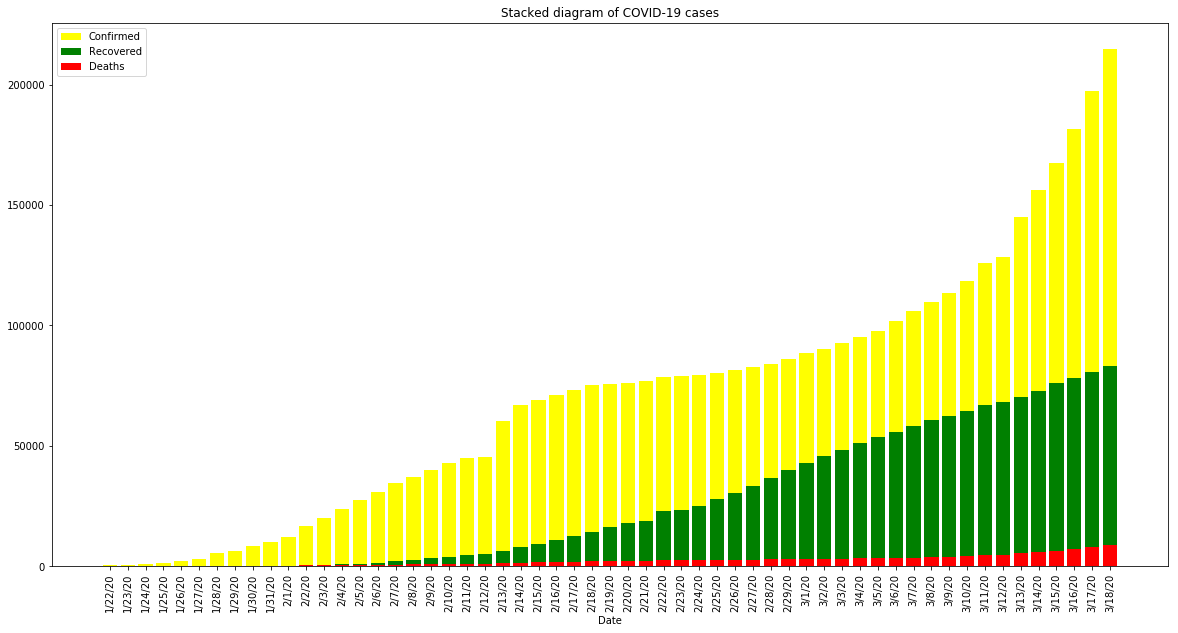

In [108]:
p1 = plt.bar(world_cases_growth['Date'], world_cases_growth['Count'], color = 'yellow')
p2 = plt.bar(world_cases_growth['Date'], world_cases_growth['recovered'], color='g')
p3 = plt.bar(world_cases_growth['Date'], world_cases_growth['deaths'], color='r')
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend([p1[0], p2[0], p3[0]], ('Confirmed', 'Recovered', 'Deaths'))
plt.xlabel("Date")
plt.title("Stacked diagram of COVID-19 cases")

In [20]:
world_cases_growth['deaths'].values[-1]/world_cases_growth['Count'].values[-1]

0.040635614908566375

#### Increase in the trend of people recovering is a very good sign and considering the growth of confirmed cases and # of deaths, mortality rate is still as low as 3.6% 

#### Let us now see the growth of virus in each country

In [21]:
con_cases_growth = confirmed_cases.groupby('Country/Region')[days_columns].agg(np.sum).reset_index()
con_cases_growth.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,11,16,21,22,22
1,Albania,0,0,0,0,0,0,0,0,0,...,2,10,12,23,33,38,42,51,55,59
2,Algeria,0,0,0,0,0,0,0,0,0,...,20,20,20,24,26,37,48,54,60,74
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,39,39
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [22]:
plt.show()

#### As per the latest data lets see what is the severity of cases in each country

In [23]:
import requests
html_response = requests.get("https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports?_pjax=%23js-repo-pjax-container")

In [24]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_response.content, "html.parser")

In [25]:
a_tags = list(map(lambda x : x.get('href'), soup.findAll(name = 'a', attrs={'class' : 'js-navigation-open '})))

In [26]:
repo_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+os.path.basename(a_tags[-2])
repo_path

'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv'

In [27]:
# daily_data = "csse_covid_19_data\\csse_covid_19_daily_reports"
# daily_data_dir = os.path.join(os.path.dirname(os.getcwd()), daily_data)
# daily_data_files = glob.glob(daily_data_dir+'/*.csv')[-1]
daily_data_files = repo_path

In [28]:
latest_data = pd.read_csv(daily_data_files)
latest_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-18T12:13:09,67800,3122,56927,30.9756,112.2707
1,NaN,Italy,2020-03-18T17:33:05,35713,2978,4025,41.8719,12.5674
2,NaN,Iran,2020-03-18T12:33:02,17361,1135,5389,32.4279,53.6880
3,NaN,Spain,2020-03-18T13:13:13,13910,623,1081,40.4637,-3.7492
4,NaN,Germany,2020-03-18T19:33:02,12327,28,105,51.1657,10.4515


In [123]:
latest_data['Province/State'] = latest_data['Province/State'].fillna(latest_data['Country/Region'])
latest_data['active'] = latest_data['Confirmed'] - (latest_data[['Deaths', 'Recovered']].sum(axis = 1))

In [125]:
agg_latest_data = latest_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'active'].agg([np.sum]).reset_index()
agg_latest_data.columns = agg_latest_data.columns.droplevel(1) 
agg_latest_data.head()

,Country/Region,Confirmed,Deaths,Recovered,active
0,Afghanistan,22,0,1,21
1,Albania,59,2,0,57
2,Algeria,74,7,12,55
3,Andorra,39,0,1,38
4,Antigua and Barbuda,1,0,0,1


In [126]:
agg_latest_data = agg_latest_data.loc[(agg_latest_data[['Confirmed', 'Deaths', 'Recovered']] > 0).all(axis=1), :].reset_index(drop = True)

In [32]:
manual_dict = {'mainland china' : 'CHN', 'north macedonia' : 'MKD', 'palestine' : 'PSE', 
               'saint barthelemy' : 'FRA', 'south korea' : 'KOR', 'st. martin' : 'PYC', 
               'uk' : 'GBR', 'us' : 'USA', 'vatican city': 'ITA'}
def get_country_code(series):
    df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
    df2 = pd.read_csv('countryCodes.csv', sep = '\t')
    country_code_dict = {row[1][0].lower() : row[1][2] for row in df.iterrows()}
    added_dict = {row[1][0].lower() : row[1][2] for row in df2.iterrows()}
#     print(country_code_dict)
    res = []
    for key in series:
        if key.lower() in country_code_dict:
            res.append(country_code_dict.get(key.lower(), None))
        elif key.lower() in added_dict:
            res.append(added_dict.get(key.lower(), None))
        else:
            res.append(manual_dict.get(key.lower(), None))
    return res

In [127]:
agg_latest_data['Code'] = get_country_code(agg_latest_data['Country/Region'])

In [128]:
from scipy.stats import rankdata

In [129]:
fig = px.choropleth(agg_latest_data, locations='Code', color=rankdata(agg_latest_data['active'])/agg_latest_data.shape[0], 
                     hover_data = ['Country/Region', 'active'], 
                     projection="natural earth", color_continuous_scale = 'YlOrRd',
                   title="Count of Active COVID-19 cases in each country")
fig.update_geos(resolution=110,
    showcountries=True, showcoastlines=False,)
# fig.show()
fig.write_html("images/worldplot.html")

https://ameyyadav09.github.io/worldplot.html

In [130]:
IFrame(src='images/worldplot.html', width=1000, height=600)

On every day new people get affected, a part of affected people recover and some people die. Let us see what is the count of active cases in each day.

#### Province/State wise distribution of Active COVID-19 cases in Each country

In [176]:
fig = px.treemap(latest_data, path = ['Country/Region', 'Province/State'], values = np.log(latest_data['active']+1),
                hover_data=['active'], title = "Province/State wise distribution of Active COVID-19 cases in Each country")
fig.update_layout(width=1000, 
                  height=2500)
fig.write_html('images/treemap_active.html')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log



https://ameyyadav09.github.io/treemap_active.html

In [177]:
IFrame(src='images/treemap_active.html', width=1000, height=2500)

#### active = confirmed - (recovered + dead)

In [131]:
world_cases_growth['active_cases'] = world_cases_growth['Count'] - (world_cases_growth[['recovered', 'deaths']].sum(axis = 1))

In [132]:
fig = px.scatter(world_cases_growth, x = 'Date', y = 'active_cases', title='Daily count of active cases of COVID 19 through out the world')
fig.show()

The number of Active cases have almost doubled with in the span of one week, 55K on 12-Mar and the number went past 120k on 18-Mar

Let us have a look at the list of countries in which Active cases grew

In [180]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,32,32,39,46,64,64,73,103,103,186
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,48,55,65,65,92,112,134,171,210,267
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,15,18,21,21,36,49,57,71,94,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,18,20,20,35,46,61,68,78,94
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,2,3,3,5,7,7,7,33,35
